# Проект Dating Application
Представьте, что вы работаете в крупном дейтинговом приложении.

Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки```*``` при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

**Проверьте:**

Был ли эксперимент успешен в целом.

```*``` *Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.*

## Описание данных:
Всего есть три группы: **тестовая (test), контрольная 1 (control_1) и контрольная 2 (control_2)**. Для каждой из них:

```users_*.csv```– информация о пользователях:

- uid – идентификатор пользователя
- age – возраст
- attraction_coeff – коэффициент привлекательности (от 0 до 1000, лайки / просмотры * 1000)
- coins – число монеток (внутренняя валюта)
- country – страна  
- visit_days – в какие дни после регистрации пользователь посещал приложение (напр. в 1, затем в 7)
- gender – пол
- age_filter_start  – фильтр поиска, мин. значение 
- age_filter_end  – фильтр поиска, макс. значение 
- views_count – число полученных оценок 
- was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги)
- is_premium –  является ли премиум
- total_revenue – нормированная выручка 

```transactions_*.csv``` – информация о платежах пользователей:

- uid – идентификатор пользователя
- country – страна
- joined_at – дата и время регистрации
- paid_at – дата и время покупки
- revenue – нормированная выручка
- payment_id – идентификатор платежа
- from_page – откуда пользователь перешел на страницу оплаты
- product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial – премиум-подписка без пробной, coins – подписка за внутреннюю валюту, other_type – другое) 

## Файлы

- **users_test** – информация о пользователях в тестовой группе. 
- **users_control_1** – информация о пользователях в первой контрольной группе. 
- **users_control_2** – информация о пользователях во второй контрольной группе.
- **transactions_test** – информация о платежах пользователей в тестовой группе.
- **transactions_control_1** – информация о платежах пользователей в первой контрольной группе. 
- **transactions_control_2** – информация о платежах пользователей во второй контрольной группе.

In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import scipy.stats as ss
import math
import datetime
from datetime import datetime as dt

## Проверка и предобработка данных

Сначала посмотрим на датасеты users_test, users_control_1, users_control_2.

In [2]:
users_test = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-samsonov/Final_project_mikhail_samsonov/Проект_3_users_test.csv', sep = ';')  # чтение данных

users_test.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


In [3]:
users_control_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-samsonov/Final_project_mikhail_samsonov/Проект_3_users_control_1.csv', sep = ';')  # чтение данных

users_control_1.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0


In [4]:
users_control_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-samsonov/Final_project_mikhail_samsonov/Проект_3_users_control_2.csv', sep = ';')  # чтение данных

users_control_2.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0


In [5]:
print('users_test group size:      ', users_test.shape,
      '\nusers_control_1 group size: ', users_control_1.shape,
      '\nusers_control_2 group size: ', users_control_2.shape)

users_test group size:       (4308, 13) 
users_control_1 group size:  (4340, 13) 
users_control_2 group size:  (4264, 13)


/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


**Пропущенные значения NaNs**, **формат данных**, **уникальные значения**, **дубликаты** в датасетах users_test, users_control_1, users_control_2:

In [6]:
# Пропущенные значения

pd.DataFrame(index = users_test.columns.tolist(), 
             data = {'users_test' : users_test.isna().sum().tolist(),
                     'users_control_1' : users_control_1.isna().sum().tolist(), 
                     'users_control_2' : users_control_2.isna().sum().tolist()})

,users_test,users_control_1,users_control_2
uid,0,0,0
age,0,0,0
attraction_coeff,0,0,0
coins,4259,4280,4203
country,0,0,0
visit_days,1330,1324,1364
gender,0,0,0
age_filter_start,0,0,0
age_filter_end,0,0,0
views_count,0,0,0


In [7]:
# Формат данных

pd.DataFrame(index = users_test.columns.tolist(), 
             data = {'users_test' : users_test.dtypes.values.tolist(),
                     'users_control_1' : users_control_1.dtypes.values.tolist(), 
                     'users_control_2' : users_control_2.dtypes.values.tolist()})

,users_test,users_control_1,users_control_2
uid,int64,int64,int64
age,int64,int64,int64
attraction_coeff,int64,int64,int64
coins,float64,float64,float64
country,object,object,object
visit_days,object,object,object
gender,int64,int64,int64
age_filter_start,int64,int64,int64
age_filter_end,int64,int64,int64
views_count,int64,int64,int64


In [8]:
# Уникальные значения

pd.DataFrame(index = users_test.columns.tolist(), 
             data = {'users_test' : users_test.nunique().tolist(),
                     'users_control_1' : users_control_1.nunique().tolist(), 
                     'users_control_2' : users_control_2.nunique().tolist()})

,users_test,users_control_1,users_control_2
uid,4308,4340,4264
age,57,56,59
attraction_coeff,600,587,585
coins,28,22,23
country,51,40,45
visit_days,891,880,837
gender,2,2,2
age_filter_start,51,53,56
age_filter_end,78,78,79
views_count,331,339,328


Касательно количества уникальных значений, можно отметить, что в датасетах users_test, users_control_1, users_control_2, все пользовательские инентификаторы uid уникальны.

Проверка того, что в разных датасетах users_test, users_control_1, users_control_2 нет одних и тех же пользовательских инентификаторов uid. Через множества:

In [9]:
users_test_uid_set = set(users_test.uid)
users_control_1_uid_set = set(users_control_1.uid)
users_control_2_uid_set = set(users_control_2.uid)

intersection_set_users_test_uid_and_users_control_1_uid = users_test_uid_set & users_control_1_uid_set
intersection_set_users_test_uid_and_users_control_2_uid = users_test_uid_set & users_control_2_uid_set
intersection_set_users_control_1_uid_and_users_control_2_uid = users_control_1_uid_set & users_control_2_uid_set

print('number of elements in intersection_set_users_test_uid_and_users_control_1_uid: ', len(intersection_set_users_test_uid_and_users_control_1_uid),
      '\nnumber of elements in intersection_set_users_test_uid_and_users_control_2_uid: ', len(intersection_set_users_test_uid_and_users_control_2_uid),
      '\nnumber of elements in intersection_set_users_control_1_uid_and_users_control_2_uid: ', len(intersection_set_users_control_1_uid_and_users_control_2_uid))

number of elements in intersection_set_users_test_uid_and_users_control_1_uid:  0 
number of elements in intersection_set_users_test_uid_and_users_control_2_uid:  0 
number of elements in intersection_set_users_control_1_uid_and_users_control_2_uid:  0


Пропущенные значения присутствуют в колонках coins, visit_days, was_premium, is_premium.

In [10]:
users_test.coins.unique()

array([      nan, 4.000e+00, 3.700e+01, 2.400e+01, 7.600e+01, 6.000e+00,
       2.000e+00, 3.780e+02, 1.000e+01, 2.480e+02, 5.300e+02, 1.000e+00,
       8.800e+01, 4.800e+01, 6.400e+01, 3.000e+00, 8.100e+01, 1.600e+01,
       2.040e+02, 1.900e+02, 5.000e+00, 2.530e+02, 2.000e+01, 7.200e+01,
       9.000e+00, 8.466e+03, 2.200e+01, 1.920e+02, 8.500e+01])

In [11]:
users_test.visit_days.unique()

array(['1,2,3,4,5,6,7,8,9,10,11,12,16,17', nan,
       '1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,22,23,26',
       '1,2,3,4,5,6,7,8,9,10,11,12', '1', '1,2,3,4', '1,2,4,5,6', '1,2,4',
       '1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25',
       '1,2', '1,2,3,4,5,6,7,8', '1,2,3,5', '2,5,6', '1,2,3,4,6,7,9,11',
       '3', '1,2,3,4,6,7,9,10,13,15,17', '1,2,3',
       '1,2,3,4,5,6,7,8,9,10,11', '1,2,3,4,5,6,7,8,9', '1,2,3,4,6,8',
       '1,2,3,4,5', '2,4,5', '2,3,5,7,8', '1,2,3,4,5,6,7,9', '1,3',
       '1,2,3,4,5,6', '1,2,3,4,6,8,10', '1,2,3,4,5,6,7',
       '1,2,3,4,5,6,7,8,9,13,14,16,17,18,19,21,22,23,24,27,30,60', '2',
       '1,2,3,4,5,7,8', '2,3,4,5,7,8,9,11,12', '1,2,3,4,5,6,7,8,9,11',
       '1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16',
       '1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,60',
       '1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26',
       '1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,

In [12]:
users_test.was_premium.unique()

array([nan,  1.])

In [13]:
users_test.is_premium.unique()

array([nan,  1.])

Логично заменить NaNs на 0. Нет данных о количестве внутренних монет coins - замена на 0. Нет данных о посещении пользователем приложения в дни после регистрации visit_days - замена на 0 (т.к. в день регистрации точно был заход в приложение). Нет данных о премиум статусе в прошлом / настоящем was_premium / is_premium - замена на 0 (не было / нет сейчас премиум статуса).

In [14]:
for dataset in [users_test, users_control_1, users_control_2]:
    dataset['coins'] = dataset.coins.fillna(0)
    dataset['visit_days'] = dataset.visit_days.fillna(0)
    dataset['was_premium'] = dataset.was_premium.fillna(0)
    dataset['is_premium'] = dataset.is_premium.fillna(0)

Дублирующиеся строки:

In [15]:
print('Количество дублирующихся строк в users_test:        ', users_test.duplicated().sum(),
      '\nКоличество дублирующихся строк в users_control_1:   ', users_control_1.duplicated().sum(), 
      '\nКоличество дублирующихся строк в users_control_2:   ', users_control_2.duplicated().sum())

Количество дублирующихся строк в users_test:         0 
Количество дублирующихся строк в users_control_1:    0 
Количество дублирующихся строк в users_control_2:    0


Затем посмотрим на датасеты transactions_test, transactions_control_1, transactions_control_2.

In [19]:
transactions_test = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-samsonov/Final_project_mikhail_samsonov/Проект_3_transactions_test.csv', sep = ';')  # чтение данных

transactions_test.head(5)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium


In [20]:
transactions_control_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-samsonov/Final_project_mikhail_samsonov/Проект_3_transactions_control_1.csv', sep = ';')  # чтение данных

transactions_control_1.head(5)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins


In [21]:
transactions_control_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-samsonov/Final_project_mikhail_samsonov/Проект_3_transactions_control_2.csv', sep = ';')  # чтение данных

transactions_control_2.head(5)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial


In [22]:
print('transactions_test group size:      ', transactions_test.shape,
      '\ntransactions_control_1 group size: ', transactions_control_1.shape,
      '\ntransactions_control_2 group size: ', transactions_control_2.shape)

transactions_test group size:       (273, 8) 
transactions_control_1 group size:  (1007, 8) 
transactions_control_2 group size:  (328, 8)


**Пропущенные значения NaNs**, **формат данных**, **уникальные значения**, **дубликаты** в датасетах transactions_test, transactions_control_1, transactions_control_2:

In [23]:
# Пропущенные значения

pd.DataFrame(index = transactions_test.columns.tolist(), 
             data = {'transactions_test' : transactions_test.isna().sum().tolist(),
                     'transactions_control_1' : transactions_control_1.isna().sum().tolist(), 
                     'transactions_control_2' : transactions_control_2.isna().sum().tolist()})

,transactions_test,transactions_control_1,transactions_control_2
uid,0,630,0
country,0,630,0
joined_at,0,0,0
paid_at,0,0,0
revenue,0,630,0
payment_id,0,630,0
from_page,0,630,0
product_type,0,630,0


In [24]:
# Формат данных

pd.DataFrame(index = transactions_test.columns.tolist(), 
             data = {'transactions_test' : transactions_test.dtypes.values.tolist(),
                     'transactions_control_1' : transactions_control_1.dtypes.values.tolist(), 
                     'transactions_control_2' : transactions_control_2.dtypes.values.tolist()})

,transactions_test,transactions_control_1,transactions_control_2
uid,int64,float64,int64
country,object,object,object
joined_at,object,object,object
paid_at,object,object,object
revenue,int64,float64,int64
payment_id,int64,float64,int64
from_page,object,object,object
product_type,object,object,object


In [25]:
# Уникальные значения

pd.DataFrame(index = transactions_test.columns.tolist(), 
             data = {'transactions_test' : transactions_test.nunique().tolist(),
                     'transactions_control_1' : transactions_control_1.nunique().tolist(), 
                     'transactions_control_2' : transactions_control_2.nunique().tolist()})

,transactions_test,transactions_control_1,transactions_control_2
uid,146,193,187
country,17,18,19
joined_at,146,194,187
paid_at,258,336,309
revenue,125,127,123
payment_id,6,7,6
from_page,22,25,18
product_type,4,4,4


Касательно количества уникальных значений, можно отметить, что в датасетах transactions_test, transactions_control_1, transactions_control_2, пользовательские инентификаторы uid не уникальны внутри каждого датасета.

В датасете transactions_control_1 присутствуют 630 пропущенных значений NaNs во всех колонках кроме joined_at, paid_at.

In [26]:
transactions_control_1[transactions_control_1.uid.isna()]

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
377,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
378,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
379,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
380,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
381,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1002,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [27]:
transactions_control_1[transactions_control_1.uid.isna()].dtypes

uid             float64
country          object
joined_at        object
paid_at          object
revenue         float64
payment_id      float64
from_page        object
product_type     object
dtype: object

Видно, что в колонках joined_at, paid_at тоже пропущенные значения NaTs, только они считались как строки. Следует удалить эти 630 пропущенных строк.

In [28]:
transactions_control_1 = transactions_control_1.dropna()
transactions_control_1

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins
...,...,...,...,...,...,...,...,...
372,891556971.0,France,2017-01-11 05:07:00,2017-01-11 05:16:00,2886.0,68.0,none,premium_no_trial
373,892052106.0,Spain,2017-10-22 01:38:00,2017-10-29 03:44:00,12883.0,147.0,trial_vip_popup,trial_premium
374,892145004.0,Chile,2017-10-20 04:25:00,2017-01-11 02:56:00,9919.0,147.0,trial_vip_popup,trial_premium
375,891458229.0,Spain,2017-03-11 12:12:00,2017-04-11 03:43:00,6305.0,19.0,menu,coins


Проверка того, что в разных датасетах transactions_test, transactions_control_1, transactions_control_2 нет одних и тех же пользовательских инентификаторов uid. Через множества:

In [29]:
transactions_test_uid_set = set(transactions_test.uid)
transactions_control_1_uid_set = set(transactions_control_1.uid)
transactions_control_2_uid_set = set(transactions_control_2.uid)

intersection_set_transactions_test_uid_and_transactions_control_1_uid = transactions_test_uid_set & transactions_control_1_uid_set
intersection_set_transactions_test_uid_and_transactions_control_2_uid = transactions_test_uid_set & transactions_control_2_uid_set
intersection_set_transactions_control_1_uid_and_transactions_control_2_uid = transactions_control_1_uid_set & transactions_control_2_uid_set

print('number of elements in intersection_set_transactions_test_uid_and_transactions_control_1_uid: ', len(intersection_set_transactions_test_uid_and_transactions_control_1_uid),
      '\nnumber of elements in intersection_set_transactions_test_uid_and_transactions_control_2_uid: ', len(intersection_set_transactions_test_uid_and_transactions_control_2_uid),
      '\nnumber of elements in intersection_set_transactions_control_1_uid_and_transactions_control_2_uid: ', len(intersection_set_transactions_control_1_uid_and_transactions_control_2_uid))

number of elements in intersection_set_transactions_test_uid_and_transactions_control_1_uid:  0 
number of elements in intersection_set_transactions_test_uid_and_transactions_control_2_uid:  0 
number of elements in intersection_set_transactions_control_1_uid_and_transactions_control_2_uid:  0


Изменим формат колонок joined_at, paid_at на datetime.

In [30]:
for dataset in [transactions_test, transactions_control_1, transactions_control_2]:   
    dataset['joined_at'] = pd.to_datetime(dataset.joined_at)
    dataset['paid_at'] = pd.to_datetime(dataset.paid_at)

Размеры датасетов users_test и transactions_test, users_control_1 и transactions_control_1, users_control_2 и transactions_control_2 отличаются. Большинство пользователей не выполяняют транзакции.

In [31]:
print('users_test group size:             ', users_test.shape,
      '\ntransactions_test group size:      ', transactions_test.shape,
      '\nusers_control_1 group size:        ', users_control_1.shape,
      '\ntransactions_control_1 group size: ', transactions_control_1.shape,
      '\nusers_control_2 group size:        ', users_control_2.shape,
      '\ntransactions_control_2 group size: ', transactions_control_2.shape)

users_test group size:              (4308, 13) 
transactions_test group size:       (273, 8) 
users_control_1 group size:         (4340, 13) 
transactions_control_1 group size:  (377, 8) 
users_control_2 group size:         (4264, 13) 
transactions_control_2 group size:  (328, 8)


Дублирующиеся строки:

In [32]:
print('Количество дублирующихся строк в transactions_test:        ', transactions_test.duplicated().sum(),
      '\nКоличество дублирующихся строк в transactions_control_1:   ', transactions_control_1.duplicated().sum(), 
      '\nКоличество дублирующихся строк в transactions_control_2:   ', transactions_control_2.duplicated().sum())

Количество дублирующихся строк в transactions_test:         7 
Количество дублирующихся строк в transactions_control_1:    21 
Количество дублирующихся строк в transactions_control_2:    5


In [33]:
transactions_test[transactions_test.duplicated() == True]

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
55,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
96,892050108,Israel,2017-10-22 03:02:00,2017-10-23 02:53:00,1261,19,empty_likes,coins
127,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
158,891508155,Latvia,2017-02-11 09:46:00,2017-03-11 22:06:00,936,19,empty_likes,coins
188,892236423,United States of America,2017-10-18 01:09:00,2017-10-22 22:08:00,1261,19,empty_likes,coins
205,892202526,United States of America,2017-10-18 20:34:00,2017-10-20 19:54:00,897,19,menu,coins
243,892339626,United States of America,2017-10-15 23:21:00,2017-10-20 18:14:00,754,19,empty_likes,coins


В качестве примера возьмем uid=892236423:

In [31]:
transactions_test[transactions_test.uid == 892236423]

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
17,892236423,United States of America,2017-10-18 01:09:00,2017-10-22 22:08:00,1261,19,empty_likes,coins
55,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
81,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:14:00,31525,19,menu,coins
98,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:14:00,12610,19,menu,coins
112,892236423,United States of America,2017-10-18 01:09:00,2017-10-22 22:09:00,12610,19,empty_likes,coins
125,892236423,United States of America,2017-10-18 01:09:00,2017-10-18 01:15:00,6292,147,left_sidebar_menu,premium_no_trial
127,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
139,892236423,United States of America,2017-10-18 01:09:00,2017-10-22 22:08:00,3783,67,empty_likes,other_type


Можно заметить, что строки с индексами 2 и 55, 3 и 127, 17 и 188 одинаковы. 

Процент дублирующихся строк:

In [32]:
print('Процент дублирующихся строк в transactions_test:        ', (transactions_test.duplicated().sum()/transactions_test.shape[0]*100).round(2), '%',
      '\nПроцент дублирующихся строк в transactions_control_1:   ', (transactions_control_1.duplicated().sum()/transactions_control_1.shape[0]*100).round(2), '%', 
      '\nПроцент дублирующихся строк в transactions_control_2:   ', (transactions_control_2.duplicated().sum()/transactions_control_2.shape[0]*100).round(2), '%')

Процент дублирующихся строк в transactions_test:         2.56 % 
Процент дублирующихся строк в transactions_control_1:    5.57 % 
Процент дублирующихся строк в transactions_control_2:    1.52 %


В датасетах users_test, users_control_1, users_control_2 есть колонка total_revenue, где подсчитана нормированная выручка. Учитываются ли дублирующиеся строки из датасетов transactions_test, transactions_control_1, transactions_control_2 при подсчете total_revenue? Проверим для uid=892236423:

In [33]:
print('Учитываются ли revenue дублирующихся строк из датасетов transactions_* при подсчете total_revenue из датасетов users_*?\n', 
      (transactions_test[transactions_test.uid == 892236423].revenue.sum() == users_test[users_test.uid == 892236423].total_revenue).values[0])

Учитываются ли revenue дублирующихся строк из датасетов transactions_* при подсчете total_revenue из датасетов users_*?
 True


Следует удалить дубликаты из датасетов transactions_test, transactions_control_1, transactions_control_2, чтобы не было лишнего подсчета revenue в данных из-за дубликатов. Проверим для uid=892236423 будут ли совпадать сумма revenue и total_revenue после удаления дублирующихся строк:

In [34]:
transactions_test = transactions_test.drop_duplicates(keep='first')
transactions_control_1 = transactions_control_1.drop_duplicates(keep='first')
transactions_control_2 = transactions_control_2.drop_duplicates(keep='first')

In [35]:
print('После удаления дублирующихся строк из датасетов transactions_* совпадают ли сумма revenue из датасетов transactions_* и total_revenue из датасетов users_*?\n', 
      (transactions_test[transactions_test.uid == 892236423].revenue.sum() == users_test[users_test.uid == 892236423].total_revenue).values[0])

После удаления дублирующихся строк из датасетов transactions_* совпадают ли сумма revenue из датасетов transactions_* и total_revenue из датасетов users_*?
 False


Нет, не совпадают. Это видно на примере uid=892236423.

Так как объем представленных данных небольшой, мне кажется разумным обратить внимание на правильную фильтрацию данных на этапе выгрузки из базы данных. Это может быть системная проблема и лучшим решением было бы сделать правильную выгрузку данных из базы данных, для того, чтобы не делать потом костыли (чтобы были правильные файлы transactions_test, transactions_control_1, transactions_control_2 без дубликатов). Здесь считаю возможным оставить все как есть, так как процент дублирующихся строк маленький.

Разумно в дальнейшем анализе при подсчете выручки смотреть на колонку revenue в датасетах transactions_*****, а на колонку total_revenue из датасетов users_***** не смотреть из-за дубликатов.

Проверка от обратного того, что в датасетах transactions_test, transactions_control_1, transactions_control_2 дата и время регистрации joined_at была раньше даты и времени покупки paid_at:

In [36]:
transactions_test.query('joined_at > paid_at')
# transactions_control_1.query('joined_at > paid_at')
# transactions_control_2.query('joined_at > paid_at')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
11,891861048,Canada,2017-10-26 02:55:00,2017-10-11 19:00:00,3588,68,none,premium_no_trial
20,891806280,United States of America,2017-10-27 08:56:00,2017-03-11 10:57:00,8242,147,trial_vip_popup,trial_premium
24,891786216,Spain,2017-10-27 18:20:00,2017-03-11 20:20:00,12818,147,trial_vip_popup,trial_premium
25,892057347,France,2017-10-21 23:15:00,2017-08-11 01:56:00,1209,19,none,coins
36,891589239,Italy,2017-10-31 14:16:00,2017-09-11 15:44:00,6305,19,empty_likes,coins
37,892037613,United States of America,2017-10-22 11:48:00,2017-04-11 00:59:00,897,19,empty_likes,coins
38,892065108,France,2017-10-21 20:40:00,2017-08-11 22:45:00,7098,147,popular_users_chat,premium_no_trial
47,891640689,France,2017-10-30 13:47:00,2017-06-11 17:31:00,16432,147,none,trial_premium
56,892261437,Italy,2017-10-17 14:22:00,2017-06-11 11:51:00,1898,68,none,premium_no_trial
58,891764031,Belgium,2017-10-28 06:09:00,2017-04-11 11:09:00,12766,147,trial_vip_popup,trial_premium


Количество таких пользователей и их доля в процентах от всех пользователей:

In [37]:
print('Количество необычных пользователей в transactions_test:        ', transactions_test.query('joined_at > paid_at').uid.nunique(),
      '\nПроцент необычных пользователей в transactions_test:           ', round(transactions_test.query('joined_at > paid_at').uid.nunique()/transactions_test.shape[0]*100, 2), '%',
      '\nКоличество необычных пользователей в transactions_control_1:   ', transactions_control_1.query('joined_at > paid_at').uid.nunique(),
      '\nПроцент необычных пользователей в transactions_control_1:      ', round(transactions_control_1.query('joined_at > paid_at').uid.nunique()/transactions_control_1.shape[0]*100, 2), '%', 
      '\nКоличество необычных пользователей в transactions_control_2:   ', transactions_control_2.query('joined_at > paid_at').uid.nunique(),
      '\nПроцент необычных пользователей в transactions_control_2:      ', round(transactions_control_2.query('joined_at > paid_at').uid.nunique()/transactions_control_2.shape[0]*100, 2), '%')

Количество необычных пользователей в transactions_test:         35 
Процент необычных пользователей в transactions_test:            13.16 % 
Количество необычных пользователей в transactions_control_1:    37 
Процент необычных пользователей в transactions_control_1:       10.39 % 
Количество необычных пользователей в transactions_control_2:    41 
Процент необычных пользователей в transactions_control_2:       12.69 %


В данных присутствует значительное количество пользователей с датой и временем регистрации joined_at раньшим, чем дата и время покупки paid_at. Мне кажется разумным обратить внимание на правильную фильтрацию данных на этапе выгрузки из базы данных, может произошла ошибка при выгрузке данных. На данном этапе логично удалить такие данные из дальнейшего анализа:

In [38]:
transactions_test = transactions_test.query('joined_at <= paid_at')
transactions_control_1 = transactions_control_1.query('joined_at <= paid_at')
transactions_control_2 = transactions_control_2.query('joined_at <= paid_at')

## Проверка схожести распределения данных по разным характеристикам


Для проведения A/B теста нужно, чтобы данные в группах не различались сильно по странам, соотношению полов, возрастам, коэффициенту привлекательности, а также дата и время регистрации / дата и время покупки должны быть распределены похожим образом между группами. Это позволит интерпетировать возможные различия между группами изменением в продукте.

Для удобства дальнейшего анализа можно объединить датасеты users_test, users_control_1, users_control_2 и датасеты transactions_test, transactions_control_1, transactions_control_2:

In [39]:
# Добавление колонки group
users_test['group'] = 'test'
users_control_1['group'] = 'control_1'
users_control_2['group'] = 'control_2'

users_full = pd.concat([users_test, users_control_1, users_control_2])

# Добавление колонки group
transactions_test['group'] = 'test'
transactions_control_1['group'] = 'control_1'
transactions_control_2['group'] = 'control_2'

transactions_full = pd.concat([transactions_test, transactions_control_1, transactions_control_2])

Cначала нужно посмотреть распределения количества уникальных стран в разных группах. Колонка country (cтрана пользователя) есть и в датасете users_full и в датасете transactions_full. В рамках A/B теста для новых пользователей из нескольких стран была изменена стоимость премиум-подписки при покупке через две новые платежные системы. Логично изучить распределения количества уникальных стран в разных группах в датасете transactions_full, т.к. там только пользователи заплатившие за премиум-подписку.

In [40]:
transactions_full.groupby('group', as_index=False).agg({'country': 'nunique'}).rename(columns={'country': 'unique_countries_number'})

,group,unique_countries_number
0,control_1,18
1,control_2,17
2,test,16


In [41]:
transactions_full.groupby('country', as_index=False).agg({'group': 'nunique'}).rename(columns={'group': 'unique_groups_number'})

,country,unique_groups_number
0,Argentina,3
1,Australia,2
2,Belgium,3
3,Canada,3
4,Chile,3
5,France,3
6,Germany,3
7,India,1
8,Israel,3
9,Italy,3


Считаю нужным оставить только те страны, которые есть в каждой группе хотя бы 1 раз:

In [42]:
countries_list = transactions_full.groupby('country', as_index=False).agg({'group': 'nunique'}) \
                                  .rename(columns={'group': 'unique_groups_number'}).query('unique_groups_number == 3') \
                                  .country.to_list()
countries_list

['Argentina',
 'Belgium',
 'Canada',
 'Chile',
 'France',
 'Germany',
 'Israel',
 'Italy',
 'Spain',
 'Switzerland',
 'Turkey',
 'United Arab Emirates',
 'United Kingdom (Great Britain)',
 'United States of America']

In [43]:
transactions_full = transactions_full.query('country in @countries_list')
transactions_full

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,test
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test
2,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,test
3,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type,test
4,892168170.0,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,test
...,...,...,...,...,...,...,...,...,...
323,891985866.0,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640.0,147.0,trial_vip_popup,trial_premium,control_2
324,891491145.0,United States of America,2017-02-11 18:13:00,2017-09-11 20:32:00,12727.0,147.0,send_message,trial_premium,control_2
325,892053750.0,United States of America,2017-10-22 00:46:00,2017-10-28 08:17:00,1261.0,19.0,autorefill,coins,control_2
326,891668253.0,Chile,2017-10-29 23:08:00,2017-11-15 00:57:00,9997.0,147.0,trial_vip_popup,trial_premium,control_2


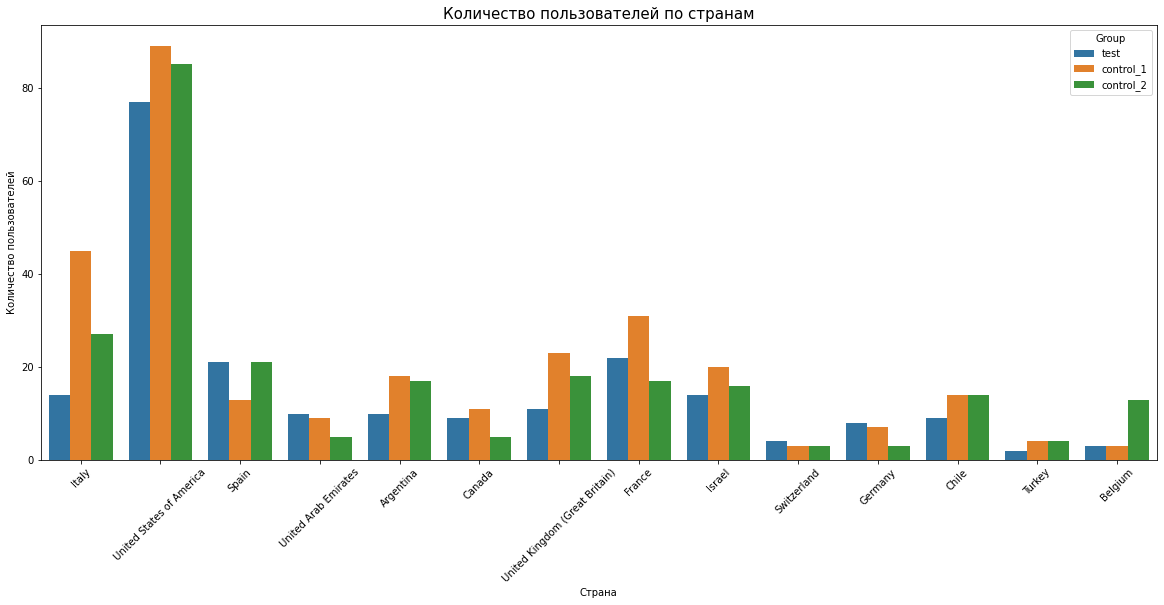

In [44]:
plt.figure(figsize=(20, 8))
plt.title('Количество пользователей по странам', fontsize=15)
sns.countplot(data = transactions_full, x ='country', hue = 'group')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)[1]
plt.legend(title='Group')

Далее можно посмотреть на распределения даты и времени регистрации (joined_at) / даты и времени покупки (paid_at) между группами:

In [45]:
print('Дата и время регистрации в датасетах с {} до {}.'.format(transactions_full['joined_at'].min(),
                                                 transactions_full['joined_at'].max()))

Дата и время регистрации в датасетах с 2017-01-11 01:06:00 до 2017-10-31 23:40:00.


In [46]:
print('Дата и время совершения покупки в датасетах с {} до {}.'.format(transactions_full['paid_at'].min(),
                                                 transactions_full['paid_at'].max()))

Дата и время совершения покупки в датасетах с 2017-01-11 05:16:00 до 2017-12-11 23:28:00.


In [47]:
# Добавим колонки с месяцем регистрации и месяцем совершения покупки
transactions_full['joined_at_month'] = pd.to_datetime(transactions_full.joined_at).dt.strftime('%Y-%m')
transactions_full['paid_at_month'] = pd.to_datetime(transactions_full.paid_at).dt.strftime('%Y-%m')

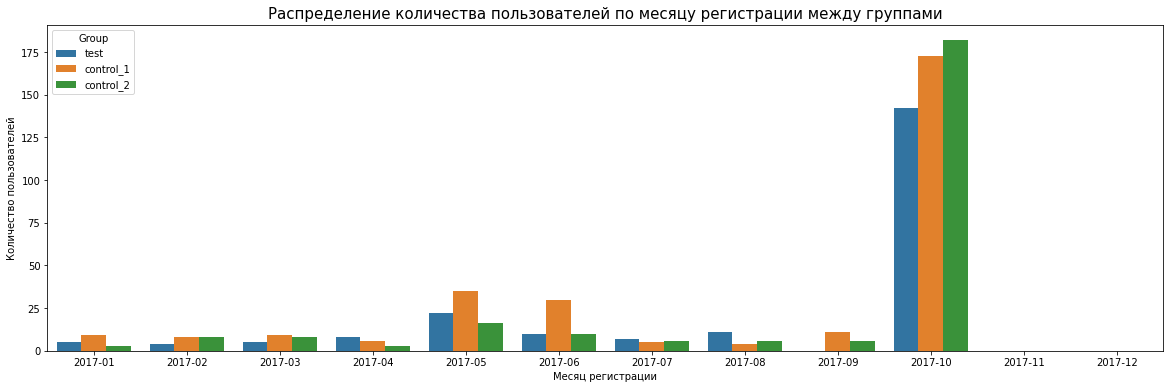

In [48]:
plt.figure(figsize=(20, 6))
plt.title('Распределение количества пользователей по месяцу регистрации между группами', fontsize=15)
sns.countplot(data = transactions_full, x ='joined_at_month', hue = 'group', order = ['2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'])  # такой order, т.к. видно какие месяцы присутствуют 
plt.xlabel('Месяц регистрации')
plt.ylabel('Количество пользователей')
plt.legend(title='Group')

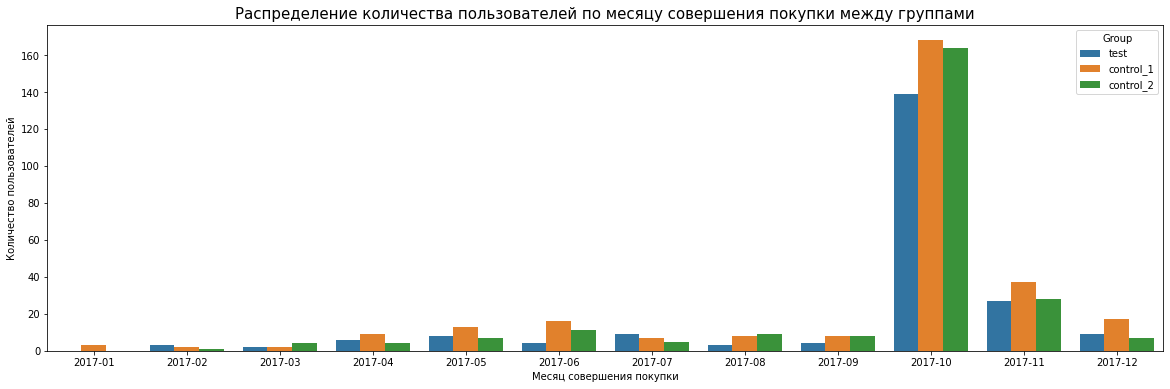

In [49]:
plt.figure(figsize=(20, 6))
plt.title('Распределение количества пользователей по месяцу cовершения покупки между группами', fontsize=15)
sns.countplot(data = transactions_full, x ='paid_at_month', hue = 'group', order = ['2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'])  # такой order, т.к. видно какие месяцы присутствуют
plt.xlabel('Месяц совершения покупки')
plt.ylabel('Количество пользователей')
plt.legend(title='Group')

Видно, что в октябре было больше всего регистраций (позже регистраций не было ), а в октябре, ноябре и декабре было больше всего совершений покупок. Возможно, именно в октябре были привлечены новые пользователи и запущен AB-тест.

Для того, чтобы посмотреть на соотношение полов и возрастов (выбранных в фильтре поиска) внутри разных групп, удобно объединить датасеты transactions_full и users_full:

In [50]:
transactions_users_full = transactions_full.merge(users_full.drop(columns=['country', 'group']), on='uid', how='left')
transactions_users_full

# Oтфильтрованная колонка country в датасете transactions_full, поэтому колонку country из датасета users_full можно предварительно убрать.
# То же самое с колонкой group.

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group,joined_at_month,...,attraction_coeff,coins,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,test,2017-05,...,209,0.0,"1,2,3,4,5,6,8,10",1,49,55,43,1.0,1.0,12909
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test,2017-10,...,390,0.0,"1,2,3,4,6,7",1,34,40,64,1.0,1.0,13923
2,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,test,2017-10,...,262,378.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1.0,1.0,95823
3,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type,test,2017-10,...,262,378.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1.0,1.0,95823
4,892168170.0,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,test,2017-10,...,406,4.0,"1,2,4,5,6,7,8,9,10,13,15,16,17,18,19,20,22,23,...",1,26,32,86,1.0,1.0,15392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,891985866.0,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640.0,147.0,trial_vip_popup,trial_premium,control_2,2017-10,...,349,4.0,"1,2,3,4,5,6,7,8,10,11,12,14,16,17,19,21,22",1,21,99,63,1.0,1.0,20605
748,891491145.0,United States of America,2017-02-11 18:13:00,2017-09-11 20:32:00,12727.0,147.0,send_message,trial_premium,control_2,2017-02,...,875,0.0,"1,2,3",1,18,31,24,1.0,1.0,12727
749,892053750.0,United States of America,2017-10-22 00:46:00,2017-10-28 08:17:00,1261.0,19.0,autorefill,coins,control_2,2017-10,...,216,6.0,"1,2,3,4,5,7,8,9,10,11",1,17,23,166,1.0,1.0,8814
750,891668253.0,Chile,2017-10-29 23:08:00,2017-11-15 00:57:00,9997.0,147.0,trial_vip_popup,trial_premium,control_2,2017-10,...,189,14.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17",1,24,38,190,1.0,1.0,20085


Теперь можно посмотреть на соотношение полов:

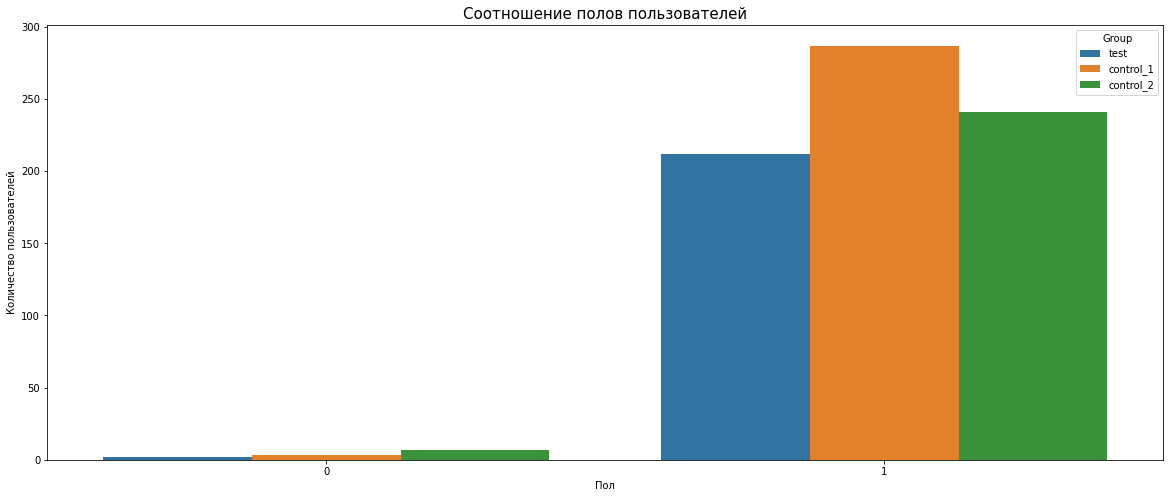

In [51]:
plt.figure(figsize=(20, 8))
plt.title('Cоотношение полов пользователей', fontsize=15)
sns.countplot(data = transactions_users_full, x ='gender', hue = 'group')  
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')
plt.legend(title='Group')

Далее распределение возрастов:

Text(0, 0.5, 'Количество пользователей')

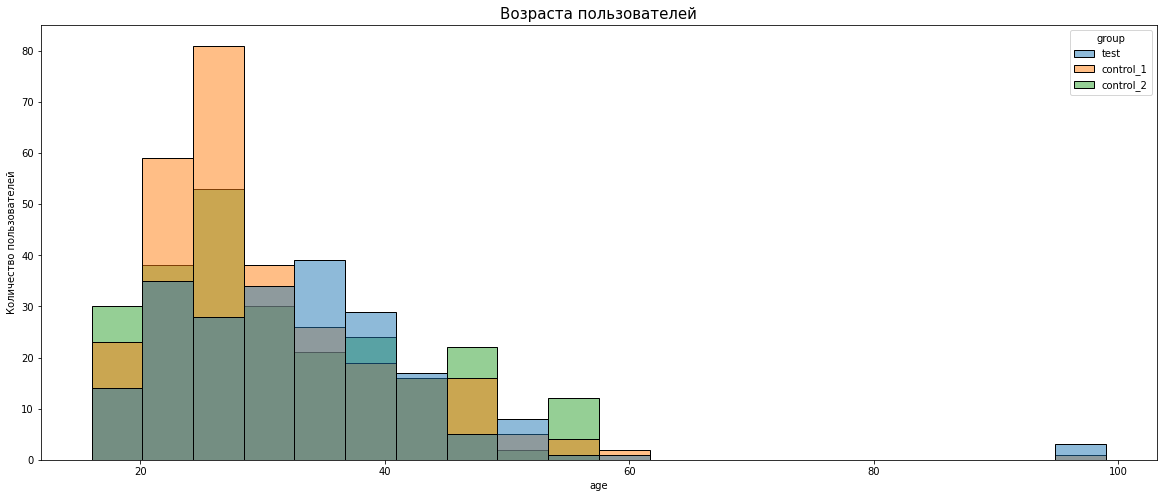

In [52]:
plt.figure(figsize=(20, 8))
plt.title('Возраста пользователей', fontsize=15)
sns.histplot(data = transactions_users_full, x ='age', hue = 'group', bins=20) 
plt.ylabel('Количество пользователей')

Присутствуют возраста пользователей > 90 лет. Вероятно некоторые пользователи не хотели указывать свой возраст, поэтому не считаю нужным убирать эти выбросы из данных.

Посмотрим на распределение коэффициента привлекательности:

Text(0, 0.5, 'Количество пользователей')

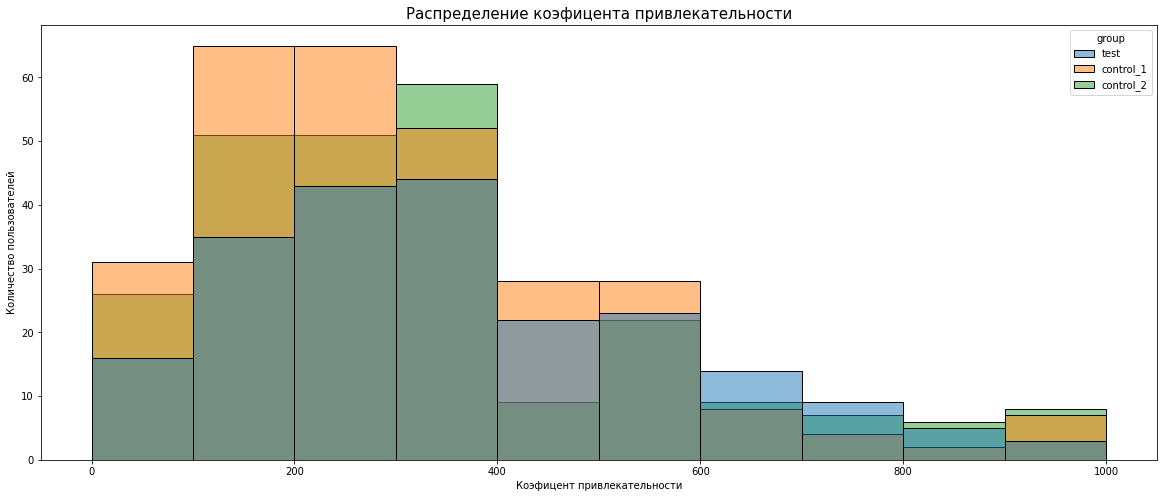

In [53]:
plt.figure(figsize=(20, 8))
plt.title('Распределение коэфицента привлекательности', fontsize=15)
sns.histplot(data = transactions_users_full, x ='attraction_coeff', hue = 'group', bins=10)  
plt.xlabel('Коэфицент привлекательности')
plt.ylabel('Количество пользователей')

Cравнение для разных групп таких распределений характеристик пользователей, как страна, дата и время регистрации / дата и время покупки, соотношение полов, возраст, коэффициент привлекательности, показало, что система сплитования сработала нормально и характеристики пользователей похожи. Стоит отметить, что датасеты для дальнейшего анализа были "почищены": убраны дубликаты, оставлены только пользователи страна которых присутствует во всех 3-х группах, дата покупки пользователей строго позже даты регистрации, пользователи месяц регистрации / покупки которых присутствует во всех 3-х группах.

Далее нужно задать метрики и определить был ли эксперимент успешен в целом.

## Выручка


В задании сказано: *Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки при покупке через две новые платежные системы.*

Вероятно информация о платежных системах есть в колонке payment_id (идентификатор платежа):

In [54]:
transactions_users_full.payment_id.unique()

array([147.,  67.,  19., 146.,  68.,   0., 127.])

Нужно посмотреть, какие 2 новые платежные системы использовались. Так как премиум-подписка покупалась через 2 новые платежные системы, а не внутренние монеты, вероятно речь идет о типе продукта premium_no_trial (премиум-подписка без пробной). 

In [55]:
transactions_users_full.query('product_type=="premium_no_trial"') \
                       .groupby(['group', 'payment_id'], as_index=False) \
                       .agg({'uid':'nunique', 'paid_at':'count'}) \
                       .rename(columns={'uid': 'number_of_unique_users', 'paid_at': 'number_of_purchases'})

,group,payment_id,number_of_unique_users,number_of_purchases
0,control_1,0.0,2,2
1,control_1,68.0,13,14
2,control_1,147.0,72,75
3,control_2,68.0,11,11
4,control_2,147.0,74,77
5,test,0.0,1,1
6,test,68.0,8,10
7,test,147.0,50,52


2 новые платежные системы:  *68*, *147*. С платежной системы *0* было совершено в общей сложности всего 3 покупки, поэтому ее можно не учитывать в рамках эксперимента.

Новый датасет для проверки успешности эксперимента:

In [56]:
experiment = transactions_users_full.query('product_type == "premium_no_trial" and payment_id in [68, 147]')
experiment


,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group,joined_at_month,...,attraction_coeff,coins,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
5,892426491.0,United States of America,2017-10-14 10:13:00,2017-10-15 22:39:00,12597.0,147.0,autoreply_message,premium_no_trial,test,2017-10,...,625,0.0,"1,2,3",1,25,61,56,1.0,0.0,12597
6,891558921.0,United States of America,2017-01-11 03:07:00,2017-10-11 09:05:00,9100.0,147.0,left_sidebar_menu,premium_no_trial,test,2017-01,...,470,6.0,"9,11",1,22,40,17,1.0,1.0,9997
11,891178380.0,Spain,2017-08-11 03:54:00,2017-09-11 21:53:00,113477.0,147.0,promo_09,premium_no_trial,test,2017-08,...,275,85.0,"1,2,4,5,6,7",1,26,36,287,1.0,1.0,129870
18,891312873.0,Italy,2017-05-11 21:22:00,2017-10-11 21:51:00,7852.0,147.0,promo_09,premium_no_trial,test,2017-05,...,125,16.0,"1,2,3,4,5,6,7,8,9",1,16,23,48,1.0,1.0,11778
19,891071157.0,United States of America,2017-10-11 10:20:00,2017-10-11 16:37:00,9100.0,147.0,promo_09,premium_no_trial,test,2017-10,...,411,0.0,"1,2,3,4,5",1,27,32,34,1.0,1.0,9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,891393735.0,Spain,2017-04-11 17:31:00,2017-04-11 18:05:00,6292.0,147.0,dating,premium_no_trial,control_2,2017-04,...,145,0.0,"1,2,3,4,5,6,7,8,9,10,11",1,20,42,110,1.0,1.0,6292
743,892053750.0,United States of America,2017-10-22 00:46:00,2017-10-28 08:12:00,6292.0,147.0,autoreply_message,premium_no_trial,control_2,2017-10,...,216,6.0,"1,2,3,4,5,7,8,9,10,11",1,17,23,166,1.0,1.0,8814
745,892032072.0,United Kingdom (Great Britain),2017-10-22 14:21:00,2017-10-23 15:37:00,3588.0,68.0,none,premium_no_trial,control_2,2017-10,...,0,0.0,"1,2,3",0,16,99,16157,1.0,0.0,3588
746,891435993.0,Canada,2017-03-11 21:08:00,2017-03-11 21:26:00,3549.0,68.0,none,premium_no_trial,control_2,2017-03,...,500,16.0,1,1,25,31,2,1.0,0.0,6097


Проверим распределение выручки (средняя, суммарная) по месяцам. 

Средняя выручка = суммарная выручка / количество покупок.

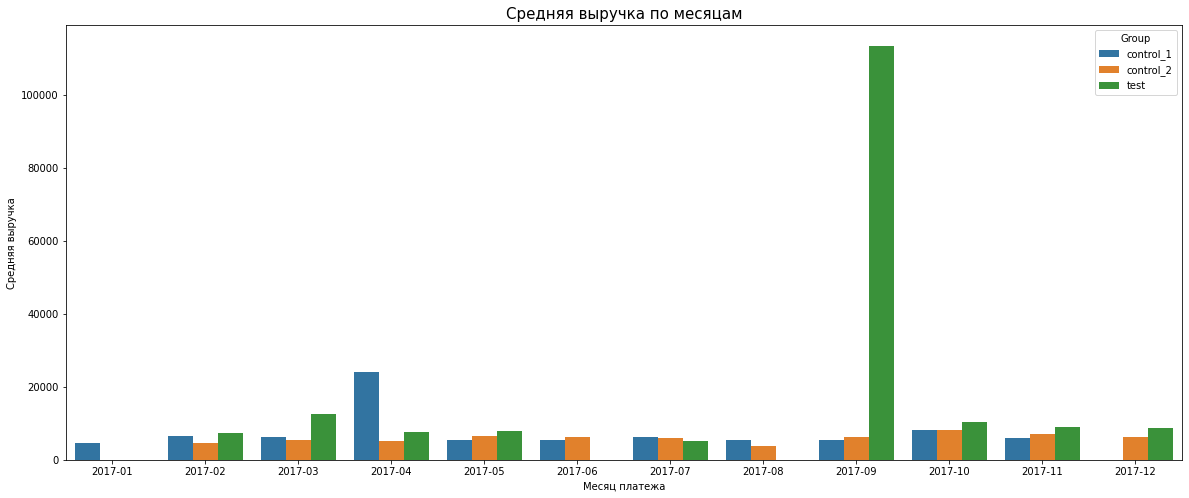

In [57]:
plt.figure(figsize=(20, 8))
sns.barplot(data = experiment.groupby(['group','paid_at_month'], as_index = False).agg({'revenue': 'mean'}), x = 'paid_at_month', y = 'revenue', hue = 'group')
plt.title('Средняя выручка по месяцам', fontsize=15)
plt.xlabel('Месяц платежа')
plt.ylabel('Средняя выручка')
plt.legend(title='Group', loc='upper right')

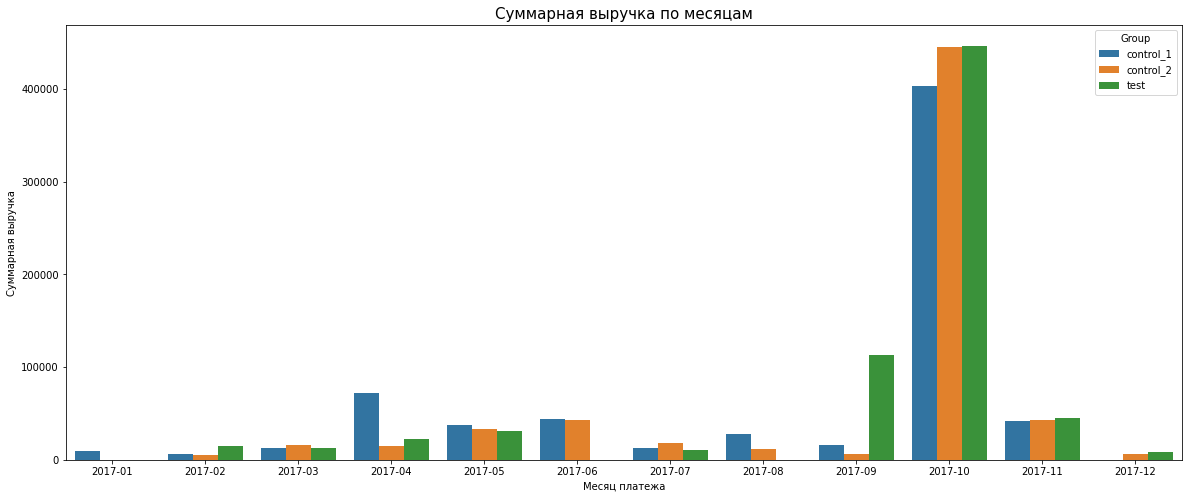

In [58]:
plt.figure(figsize=(20, 8))
sns.barplot(data = experiment.groupby(['group','paid_at_month'], as_index = False).agg({'revenue': 'sum'}), x = 'paid_at_month', y = 'revenue', hue = 'group')
plt.title('Суммарная выручка по месяцам', fontsize=15)
plt.xlabel('Месяц платежа')
plt.ylabel('Суммарная выручка')
plt.legend(title='Group', loc='upper right')

Проверим сколько покупок было совершено по месяцам, соответствующие значения выручки:

In [59]:
experiment.groupby(['group','paid_at_month'], as_index=False) \
          .agg({'revenue': 'mean', 'uid': 'count'}) \
          .rename(columns={'revenue': 'revenue_mean', 'uid': 'number_of_purchases'})

,group,paid_at_month,revenue_mean,number_of_purchases
0,control_1,2017-01,4589.000000,2
1,control_1,2017-02,6448.000000,1
2,control_1,2017-03,6370.000000,2
3,control_1,2017-04,24154.000000,3
4,control_1,2017-05,5385.714286,7
5,control_1,2017-06,5523.375000,8
6,control_1,2017-07,6292.000000,2
7,control_1,2017-08,5483.400000,5
8,control_1,2017-09,5486.000000,3
9,control_1,2017-10,8236.959184,49


In [60]:
experiment.query('group == "test" and paid_at_month == "2017-09"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group,joined_at_month,...,attraction_coeff,coins,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
11,891178380.0,Spain,2017-08-11 03:54:00,2017-09-11 21:53:00,113477.0,147.0,promo_09,premium_no_trial,test,2017-08,...,275,85.0,"1,2,4,5,6,7",1,26,36,287,1.0,1.0,129870


Видно, что пик на графике "Средняя выручка по месяцам" в сентябре для test группы вызван 1-ой единственной очень крупной покупкой 1-го пользователя. Думаю, можно считать это выбросом. Предполагаю, что нужно проверить достоверность этого значения и правильность внесения / выгрузки этого значения в базу данных / из бызы данных. Ведь команда дейтингого приложения должна знать стоимость подписки, с каких каналов привлечения, стран самая высокая стоимость подписки. Системой это назвать нельзя.

Новых пользователей для которых был проведен AB-тест будем считать тех, кто зарегистрировался начиная с октября 2017 исходя из ранее построенных графиков "Распределение количества пользователей по месяцу регистрации между группами" и "Распределение количества пользователей по месяцу cовершения покупки между группами".

In [61]:
experiment_AB_test = experiment.query('joined_at_month == "2017-10"')
experiment_AB_test

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group,joined_at_month,...,attraction_coeff,coins,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
5,892426491.0,United States of America,2017-10-14 10:13:00,2017-10-15 22:39:00,12597.0,147.0,autoreply_message,premium_no_trial,test,2017-10,...,625,0.0,"1,2,3",1,25,61,56,1.0,0.0,12597
19,891071157.0,United States of America,2017-10-11 10:20:00,2017-10-11 16:37:00,9100.0,147.0,promo_09,premium_no_trial,test,2017-10,...,411,0.0,"1,2,3,4,5",1,27,32,34,1.0,1.0,9100
22,892370097.0,United States of America,2017-10-15 13:37:00,2017-10-16 15:55:00,11115.0,68.0,none,premium_no_trial,test,2017-10,...,197,0.0,"1,2,3,5,6,7,8,10,13",1,34,38,137,1.0,0.0,11115
23,892229262.0,United States of America,2017-10-18 07:20:00,2017-10-19 04:23:00,9100.0,147.0,promo_09,premium_no_trial,test,2017-10,...,288,0.0,"1,2",1,16,22,52,1.0,1.0,9100
25,892356876.0,United Kingdom (Great Britain),2017-10-15 18:13:00,2017-10-15 20:46:00,7371.0,147.0,autoreply_message,premium_no_trial,test,2017-10,...,384,0.0,"1,2,3,4,5,7,8,10,12,13,14,15,16,17,18,19,21,22...",1,22,40,13,1.0,1.0,7371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,891068079.0,Argentina,2017-10-11 11:45:00,2017-12-11 15:23:00,6292.0,147.0,promo_09,premium_no_trial,control_2,2017-10,...,294,4.0,"1,2,3,4",1,18,45,17,1.0,1.0,10296
736,892111575.0,Germany,2017-10-20 22:14:00,2017-10-20 22:27:00,7930.0,147.0,left_sidebar_menu,premium_no_trial,control_2,2017-10,...,500,0.0,"1,2",1,31,37,4,1.0,0.0,7930
737,892045743.0,Israel,2017-10-22 07:04:00,2017-10-22 18:35:00,6292.0,147.0,dating,premium_no_trial,control_2,2017-10,...,220,6.0,"1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,18,20,22,2...",1,23,29,59,1.0,1.0,10075
743,892053750.0,United States of America,2017-10-22 00:46:00,2017-10-28 08:12:00,6292.0,147.0,autoreply_message,premium_no_trial,control_2,2017-10,...,216,6.0,"1,2,3,4,5,7,8,9,10,11",1,17,23,166,1.0,1.0,8814


Количество уникальных пользователей в каждой группе:

In [62]:
experiment_AB_test.groupby('group', as_index=False).agg({'uid': 'nunique'})

,group,uid
0,control_1,49
1,control_2,56
2,test,39


Думаю, что количества уникальных пользователей в 3-х конечных выборках можно считать сопоставимыми.

До этого при рассчете средней выручки по месяцам рассматривалась суммарная выручка / количество покупок, потому что количество покупок небольшое. Имеет смысл рассмотреть метрику ARPPU: суммарная выручка / количество уникальных платящих пользователей (Average Revenue Per Paying User: средний доход на платящего пользователя). Эта метрика может быть более понятна другим участникам команды. Cначала посмотрим на распределение выручек платящих пользователей:

In [63]:
ARPPU_dataset = experiment_AB_test.groupby(['group', 'uid'], as_index = False) \
                          .agg({'revenue': 'sum'}) \
                          .rename(columns={'revenue': 'revenue_per_paying_user'})
                          
ARPPU_dataset

,group,uid,revenue_per_paying_user
0,control_1,891607515.0,6292.0
1,control_1,891613833.0,1898.0
2,control_1,891676365.0,2717.0
3,control_1,891699369.0,4537.0
4,control_1,891738366.0,6292.0
...,...,...,...
139,test,892370097.0,11115.0
140,test,892390170.0,5369.0
141,test,892405179.0,9100.0
142,test,892426491.0,12597.0


In [64]:
ARPPU_dataset.revenue_per_paying_user

0       6292.0
1       1898.0
2       2717.0
3       4537.0
4       6292.0
        ...   
139    11115.0
140     5369.0
141     9100.0
142    12597.0
143     3614.0
Name: revenue_per_paying_user, Length: 144, dtype: float64

Text(0, 0.5, 'Выручка на платящего пользователя')

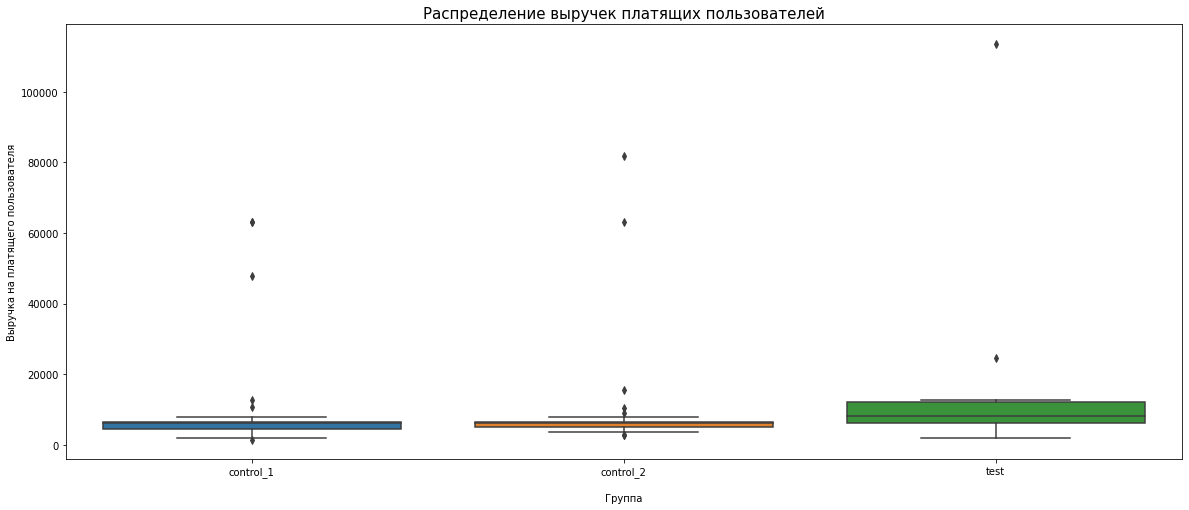

In [65]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=ARPPU_dataset, x='group', y='revenue_per_paying_user')
plt.title('Распределение выручек платящих пользователей', fontsize=15)
plt.xlabel('\nГруппа')
plt.ylabel('Выручка на платящего пользователя')

Проверим равенство средних выручек на платящего пользователя (ARPPU) в 3-х группах. 

Для использования t-test (в этом случае нужно будет объединить группы control_1 и control_2 если это возможно, т.е. 2 группы) или дисперсионного анализа (3 группы) нужно соблюсти условия:
<br/><br/>
<li>гомогенность дисперсий (дисперсии внутри групп должны быть примерно одинаковы)</li>
<li>нормальность распределений выборочных средних </li>

Проверим гомогенность дисперсий внутри групп используя критерий Левена и функцию из библиотеки pingouin (уровень значимости 0.05): 
<br/><br/>
<li>гипотеза H_0: дисперсии внутри групп одинаковы</li>
<li>гипотеза H_1: дисперсии внутри групп не одинаковы</li>

In [66]:
pg.homoscedasticity(ARPPU_dataset, dv='revenue_per_paying_user', group='group', method='levene', alpha=0.05)

,W,pval,equal_var
levene,0.311471,0.732871,True


P-value > 0.05, значит cчитаем дисперсии внутри групп примерно одинаковыми.

Проверим нормальность распределений выборочных средних используя сгенерированные bootstrap'ом выборки и функцию из scipy.stats (уровень значимости 0.05):
<br/><br/>
<li>гипотеза H_0: нормальность распределений выборочных средних</li>
<li>гипотеза H_1: не нормальность распределений выборочных средних</li>

In [67]:
control_1_means_t_test = []
control_2_means_t_test = []
test_means_t_test = []

for i in range(1000):
    control_1_means_t_test.append(ARPPU_dataset.query('group == "control_1"').revenue_per_paying_user.sample(frac=1, replace=True).mean())
    control_2_means_t_test.append(ARPPU_dataset.query('group == "control_2"').revenue_per_paying_user.sample(frac=1, replace=True).mean())
    test_means_t_test.append(ARPPU_dataset.query('group == "test"').revenue_per_paying_user.sample(frac=1, replace=True).mean())

In [68]:
all_means_t_test = pd.DataFrame({'control_1': control_1_means_t_test, 'control_2': control_2_means_t_test, 'test': test_means_t_test})
all_means_t_test

,control_1,control_2,test
0,6914.938776,8141.017857,8161.666667
1,7862.612245,6126.017857,7944.333333
2,9715.775510,9571.250000,8256.666667
3,6524.673469,8643.607143,19372.666667
4,8594.591837,8368.750000,8810.000000
...,...,...,...
995,11502.612245,12980.964286,14664.333333
996,9880.265306,10826.446429,8611.000000
997,6840.387755,7968.303571,14390.000000
998,7030.346939,8411.232143,11245.666667


Text(0, 0.5, 'Количество')

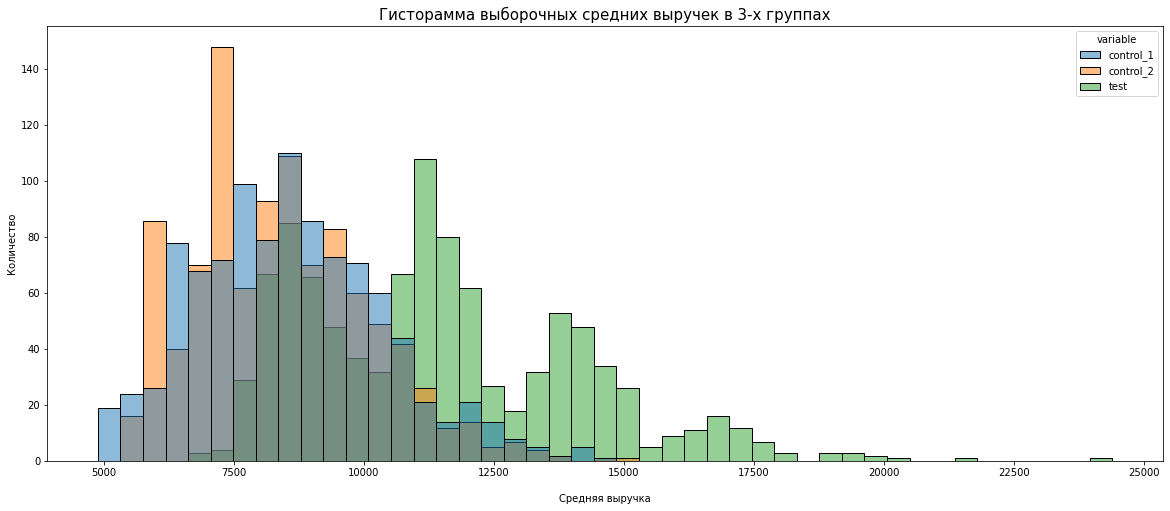

In [69]:
plt.figure(figsize=(20, 8))
sns.histplot(data=pd.melt(all_means_t_test), x='value', hue='variable')
plt.title('Гисторамма выборочных средних выручек в 3-х группах', fontsize=15)
plt.xlabel('\nСредняя выручка')
plt.ylabel('Количество')

Распределение выборочных средних в тестовой группе не выглядит нормальным, в контрольных группах 1 и 2 под вопросом.

In [70]:
ss.normaltest(all_means_t_test.control_1)

NormaltestResult(statistic=31.502514450231878, pvalue=1.4431647221520952e-07)

In [71]:
ss.normaltest(all_means_t_test.control_2)

NormaltestResult(statistic=45.99191281492973, pvalue=1.0303458498922265e-10)

In [72]:
ss.normaltest(all_means_t_test.test)

NormaltestResult(statistic=83.59217818311652, pvalue=7.050000412456237e-19)

Во всех 3-х группах p-value < 0.05, поэтому отклоняем нулевую гипотезу H_0 и считаем распределения выборочных средних в 3-х группах не нормальными. Значит t-test / дисперсионный анализ лучше не использовать.

В такоим случае нужно применить bootstrap для проверки равенства средних выручек на платящего пользователя (ARPPU) в 3-х группах, потому что bootstrap не накладывает ограничений на форму распределений внутри групп (ни на сами распределения, ни на распределения выборочных средних). До этого проверяя нормальность распределений выборочных средних в группах уже использовался bootstrap, но сейчас можно построить доверительные интервалы для разницы средних выручек в тестовой группе и контрольной группе 1, и для разницы средних выручек в тестовой группе и контрольной группе 2, сделать из этого вывод о равенстве средних выручек на платящего пользователя (ARPPU) в 3-х группах.

In [73]:
control_1_means = []
control_2_means = []
test_means = []

for i in range(10000):
    control_1_means.append(ARPPU_dataset.query('group == "control_1"').revenue_per_paying_user.sample(frac=1, replace=True).mean())
    control_2_means.append(ARPPU_dataset.query('group == "control_2"').revenue_per_paying_user.sample(frac=1, replace=True).mean())
    test_means.append(ARPPU_dataset.query('group == "test"').revenue_per_paying_user.sample(frac=1, replace=True).mean())

In [74]:
all_means = pd.DataFrame({'control_1': control_1_means, 'control_2': control_2_means, 'test': test_means})
all_means

,control_1,control_2,test
0,9577.551020,8392.892857,13639.333333
1,8847.163265,6882.571429,8543.333333
2,9465.591837,7244.017857,8194.333333
3,9027.571429,8681.214286,11051.000000
4,9644.408163,7316.910714,14068.333333
...,...,...,...
9995,5892.448980,8389.875000,14448.666667
9996,8080.693878,8184.660714,8346.333333
9997,9304.285714,8634.321429,11205.000000
9998,8554.530612,12777.607143,11646.333333


Text(0, 0.5, 'Количество')

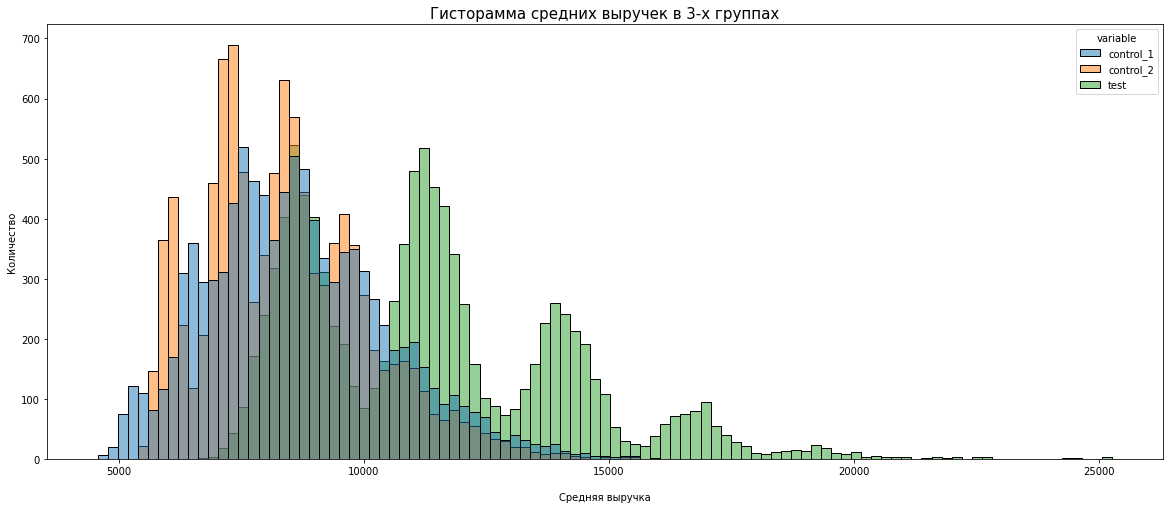

In [75]:
plt.figure(figsize=(20, 8))
sns.histplot(data=pd.melt(all_means), x='value', hue='variable')
plt.title('Гисторамма средних выручек в 3-х группах', fontsize=15)
plt.xlabel('\nСредняя выручка')
plt.ylabel('Количество')

In [76]:
print(f'Cредняя выручка в группе control_1: ' + str(all_means.control_1.mean().round(2)))
print()
print(f'Cредняя выручка в группе control_2: ' + str(all_means.control_2.mean().round(2)))
print()
print(f'Cредняя выручка в группе test: ' + str(all_means.test.mean().round(2)))

Cредняя выручка в группе control_1: 8650.57

Cредняя выручка в группе control_2: 8423.81

Cредняя выручка в группе test: 11394.72


Видно, что распределение средних выручек на платящего пользователя (ARPPU) в тестовой группе смещено вправо относительно средних выручек на платящего пользователя (ARPPU) в контрольных группах 1 и 2. 

Теперь рассчитаем доверительные интервалы для разницы средних выручек в тестовой группе и контрольной группе 1, и для разницы средних выручек в тестовой группе и контрольной группе 2 (уровень значимости = 0.05):

In [77]:
all_means['diff_means_between_test_and_control_1'] = all_means['test'] - all_means['control_1']
all_means['diff_means_between_test_and_control_2'] = all_means['test'] - all_means['control_2']
all_means

,control_1,control_2,test,diff_means_between_test_and_control_1,diff_means_between_test_and_control_2
0,9577.551020,8392.892857,13639.333333,4061.782313,5246.440476
1,8847.163265,6882.571429,8543.333333,-303.829932,1660.761905
2,9465.591837,7244.017857,8194.333333,-1271.258503,950.315476
3,9027.571429,8681.214286,11051.000000,2023.428571,2369.785714
4,9644.408163,7316.910714,14068.333333,4423.925170,6751.422619
...,...,...,...,...,...
9995,5892.448980,8389.875000,14448.666667,8556.217687,6058.791667
9996,8080.693878,8184.660714,8346.333333,265.639456,161.672619
9997,9304.285714,8634.321429,11205.000000,1900.714286,2570.678571
9998,8554.530612,12777.607143,11646.333333,3091.802721,-1131.273810


In [78]:
print(f'Доверительный интервал для разницы средних выручек в тестовой группе и контрольной группе 1: ' + '(' + str(all_means.diff_means_between_test_and_control_1.quantile(0.025).round(2)) + ', ' +str(all_means.diff_means_between_test_and_control_1.quantile(0.975).round(2)) + ')')
print()
print(f'Доверительный интервал для разницы средних выручек в тестовой группе и контрольной группе 2: ' + '(' + str(all_means.diff_means_between_test_and_control_2.quantile(0.025).round(2)) + ', ' +str(all_means.diff_means_between_test_and_control_2.quantile(0.975).round(2)) + ')')
print()

Доверительный интервал для разницы средних выручек в тестовой группе и контрольной группе 1: (-3107.75, 9838.92)

Доверительный интервал для разницы средних выручек в тестовой группе и контрольной группе 2: (-2662.81, 9914.64)



Cредняя выручка (ARPPU) в группе test выше, чем в группах control_1, control_2. Однако доверительные интервалы для разницы средних выручек в тестовой группе и контрольной группе 1, и для разницы средних выручек в тестовой группе и контрольной группе 2 (уровень значимости = 0.05) cодержат 0, значит в эксперементе статистически значимое различие между средними выручками (ARPPU) в 3-х группах не получено. 

## Конверсия в покупку премиум-подписки

Мы хотим проверить, зависит ли доля пользователей с премиум-подпиской premium_no_trial (конверсия в покупку премиум-подписки) от группы (control_1, control_2, test) с помощью метода Хи-квадрат. 
<br/><br/>
<li>гипотеза H_0: конверсия в покупку премиум-подписки одинакова и не зависит от группы</li>
<li>гипотеза H_1: конверсия в покупку премиум-подписки отличается и зависит от группы</li>

Модифицируем датасет transactions_users_full (который уже отфильтрован по странам) для рассчета конверсии:

In [79]:
transactions_users_full_CR = transactions_users_full.query('joined_at_month == "2017-10" and payment_id in [68, 147]')
transactions_users_full_CR

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group,joined_at_month,...,attraction_coeff,coins,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test,2017-10,...,390,0.0,"1,2,3,4,6,7",1,34,40,64,1.0,1.0,13923
4,892168170.0,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,test,2017-10,...,406,4.0,"1,2,4,5,6,7,8,9,10,13,15,16,17,18,19,20,22,23,...",1,26,32,86,1.0,1.0,15392
5,892426491.0,United States of America,2017-10-14 10:13:00,2017-10-15 22:39:00,12597.0,147.0,autoreply_message,premium_no_trial,test,2017-10,...,625,0.0,"1,2,3",1,25,61,56,1.0,0.0,12597
12,892032111.0,United Arab Emirates,2017-10-22 14:20:00,2017-10-29 16:41:00,13247.0,147.0,trial_vip_popup,trial_premium,test,2017-10,...,444,0.0,"1,2",1,37,43,27,1.0,1.0,13247
13,892150854.0,Argentina,2017-10-20 00:25:00,2017-10-23 01:31:00,30264.0,68.0,super_popup,other_type,test,2017-10,...,329,204.0,"1,2,3,4,5,6,10,11,12,13,14,15,16,17,18,19,20,2...",1,35,41,231,1.0,1.0,61789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,892045743.0,Israel,2017-10-22 07:04:00,2017-10-22 18:35:00,6292.0,147.0,dating,premium_no_trial,control_2,2017-10,...,220,6.0,"1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,18,20,22,2...",1,23,29,59,1.0,1.0,10075
743,892053750.0,United States of America,2017-10-22 00:46:00,2017-10-28 08:12:00,6292.0,147.0,autoreply_message,premium_no_trial,control_2,2017-10,...,216,6.0,"1,2,3,4,5,7,8,9,10,11",1,17,23,166,1.0,1.0,8814
745,892032072.0,United Kingdom (Great Britain),2017-10-22 14:21:00,2017-10-23 15:37:00,3588.0,68.0,none,premium_no_trial,control_2,2017-10,...,0,0.0,"1,2,3",0,16,99,16157,1.0,0.0,3588
747,891985866.0,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640.0,147.0,trial_vip_popup,trial_premium,control_2,2017-10,...,349,4.0,"1,2,3,4,5,6,7,8,10,11,12,14,16,17,19,21,22",1,21,99,63,1.0,1.0,20605


Список пользователей, купивших премиум-подписку premium_no_trial: 

In [80]:
premium_list = transactions_users_full.query('product_type=="premium_no_trial"').uid.tolist()

Новая колонка: 1 - пользователям, купившим премиум-подписку premium_no_trial, 0 - пользователям, не купившим премиум-подписку premium_no_trial:

In [81]:
transactions_users_full_CR['purchased_premium'] = [1 if transactions_users_full_CR.uid.iloc[i] in premium_list else 0 for i in range(transactions_users_full_CR.shape[0])]
transactions_users_full_CR

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group,joined_at_month,...,coins,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,purchased_premium
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,test,2017-10,...,0.0,"1,2,3,4,6,7",1,34,40,64,1.0,1.0,13923,0
4,892168170.0,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,test,2017-10,...,4.0,"1,2,4,5,6,7,8,9,10,13,15,16,17,18,19,20,22,23,...",1,26,32,86,1.0,1.0,15392,0
5,892426491.0,United States of America,2017-10-14 10:13:00,2017-10-15 22:39:00,12597.0,147.0,autoreply_message,premium_no_trial,test,2017-10,...,0.0,"1,2,3",1,25,61,56,1.0,0.0,12597,1
12,892032111.0,United Arab Emirates,2017-10-22 14:20:00,2017-10-29 16:41:00,13247.0,147.0,trial_vip_popup,trial_premium,test,2017-10,...,0.0,"1,2",1,37,43,27,1.0,1.0,13247,0
13,892150854.0,Argentina,2017-10-20 00:25:00,2017-10-23 01:31:00,30264.0,68.0,super_popup,other_type,test,2017-10,...,204.0,"1,2,3,4,5,6,10,11,12,13,14,15,16,17,18,19,20,2...",1,35,41,231,1.0,1.0,61789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,892045743.0,Israel,2017-10-22 07:04:00,2017-10-22 18:35:00,6292.0,147.0,dating,premium_no_trial,control_2,2017-10,...,6.0,"1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,18,20,22,2...",1,23,29,59,1.0,1.0,10075,1
743,892053750.0,United States of America,2017-10-22 00:46:00,2017-10-28 08:12:00,6292.0,147.0,autoreply_message,premium_no_trial,control_2,2017-10,...,6.0,"1,2,3,4,5,7,8,9,10,11",1,17,23,166,1.0,1.0,8814,1
745,892032072.0,United Kingdom (Great Britain),2017-10-22 14:21:00,2017-10-23 15:37:00,3588.0,68.0,none,premium_no_trial,control_2,2017-10,...,0.0,"1,2,3",0,16,99,16157,1.0,0.0,3588,1
747,891985866.0,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640.0,147.0,trial_vip_popup,trial_premium,control_2,2017-10,...,4.0,"1,2,3,4,5,6,7,8,10,11,12,14,16,17,19,21,22",1,21,99,63,1.0,1.0,20605,0


Таблица сопряжённости:

In [82]:
crosstab = (transactions_users_full_CR.groupby(['purchased_premium', 'group'], as_index=False) \
                .agg({'uid':'nunique'}) \
                .pivot(columns='purchased_premium', index='group').droplevel(0, axis=1))

crosstab 

purchased_premium,0,1
group,,
control_1,26,49
control_2,20,56
test,29,39


In [83]:
statistic, pvalue, dof, expected_freq = ss.chi2_contingency(crosstab)
print(f"pvalue = {pvalue}")

pvalue = 0.11885646133533129


In [84]:
if pvalue > 0.05:
    print('Конверсия в покупку премиум-подписки одинакова и не зависит от группы на уровне значимости = 0.05, т.к. pvalue > 0.05.')
else:
    print('Конверсия в покупку премиум-подписки отличается и зависит от группы на уровне значимости = 0.05, т.к. pvalue < 0.05.')

Конверсия в покупку премиум-подписки одинакова и не зависит от группы на уровне значимости = 0.05, т.к. pvalue > 0.05.


Зная конверсии в покупку премиум-подписки и средние выручки на платящего пользователя (ARPPU) по 3-м группам можно рассчитать средние выручки на пользователя (APRU) по 3-м группам:

In [85]:
cr_control_1 = crosstab[1][0] / (crosstab[0][0] + crosstab[1][0])
cr_control_2 = crosstab[1][1] / (crosstab[0][1] + crosstab[1][1])
cr_test = crosstab[1][2] / (crosstab[0][2] + crosstab[1][2])

In [86]:
cr = pd.DataFrame({'control_1': [cr_control_1], 'control_2': [cr_control_2], 'test': [cr_test]})
cr

,control_1,control_2,test
0,0.653333,0.736842,0.573529


In [87]:
arpu = pd.DataFrame({'control_1': [(all_means.control_1.mean() * cr.control_1)[0]],
                     'control_2': [(all_means.control_2.mean() * cr.control_2)[0]], 
                     'test': [(all_means.test.mean() * cr.test)[0]]})
arpu

,control_1,control_2,test
0,5651.708504,6207.015254,6535.206715


In [88]:
print(f'Cредняя выручка на пользователя в группе control_1: ' + str(arpu.control_1[0].round(2)))
print()
print(f'Cредняя выручка на пользователя в группе control_2: ' + str(arpu.control_2[0].round(2)))
print()
print(f'Cредняя выручка на пользователя в группе test: ' + str(arpu.test[0].round(2)))

Cредняя выручка на пользователя в группе control_1: 5651.71

Cредняя выручка на пользователя в группе control_2: 6207.02

Cредняя выручка на пользователя в группе test: 6535.21


## Выводы

Был ли эксперимент успешен в целом?

Стоит отметить, что при проведении анализа, значательная часть данных была отброшена из-за несоответствия условию эксперимента. При анализе cредних выручек на каждого платящего пользователя (ARPPU) в 3-х группах не было обнаружено статистически значимых различий с уровнем значимости = 0.05. Конверсия в покупку премиум-подписку (доля пользователей с премиум-подпиской premium_no_trial) так же статистически значимо не отличается в 3-х группах с уровнем значимости = 0.05.

Можно сделать вывод, что эксперимент не успешный в целом. Изменение цены на премиум-подписку для новых пользователей из некоторых стран при покупке через две новые платежные системы не изменили cреднюю выручку на каждого платящего пользователя (ARPPU) и конверсию в покупку премиум-подписки статистически значимо. Выкатывать новую версию приложения на всех пользователей не рекомендую.